In [1]:
# This script should make a property-property plot from the ORS data (or CSF model)
# The script reads the data as a DataFrame using "pickle"
#
# jimp 08-19-2019

In [2]:
# Import modules

In [3]:
import numpy as np
import sys
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import pickle
import ipywidgets as widgets
from IPython.display import display
get_ipython().run_line_magic('matplotlib','inline')
from ipywidgets import HBox, VBox

In [4]:
# Define some of the widgets we will use; these include drop-down menus for 
#   selecting x-axis/y-axis variables, ORS or model, colors, etc., and 
#   finally a button to make the plot

In [5]:
x_select = widgets.Dropdown(
   options = [('Shortwave heat flux', 'qs'), 
              ('Longwave heat flux', 'ql'),
              ('Latent heat flux', 'lhtfl'),
              ('Sensible heat flux', 'shtfl'),
              ('Net heat flux', 'qnet'),
              ('Surface pressure', 'pressfc'),
              ('Rain rate', 'prate'),
              ('Sea surface temp', 'tmpsfc'),
              ('Surface air temp', 'tmp2m'),
              ('Zonal wind stress', 'wndstrsu'),
              ('Meridional wind stress', 'wndstrsv'),
              ('Wind stress magnitude', 'wndstrsu'),
              ('Zonal wind speed', 'wnd10mu'),
              ('Meridional wind speed', 'wnd10mv'),
              ('Wind speed', 'wndspd'),
              ('Humidity', 'q2m')
             ],
   description = 'X-axis variable:',
)
y_select = widgets.Dropdown(
   options = [('Shortwave heat flux', 'qs'), 
              ('Longwave heat flux', 'ql'),
              ('Latent heat flux', 'lhtfl'),
              ('Sensible heat flux', 'shtfl'),
              ('Net heat flux', 'qnet'),
              ('Surface pressure', 'pressfc'),
              ('Rain rate', 'prate'),
              ('Sea surface temp', 'tmpsfc'),
              ('Surface air temp', 'tmp2m'),
              ('Zonal wind stress', 'wndstrsu'),
              ('Meridional wind stress', 'wndstrsv'),
              ('Wind stress magnitude', 'wndstrsu'),
              ('Zonal wind speed', 'wnd10mu'),
              ('Meridional wind speed', 'wnd10mv'),
              ('Wind speed', 'wndspd'),
              ('Humidity', 'q2m')
             ],
   description = 'Y-axis variable:',
)
c_select = widgets.Dropdown(
   options = [('Shortwave heat flux', 'qs'), 
              ('Longwave heat flux', 'ql'),
              ('Latent heat flux', 'lhtfl'),
              ('Sensible heat flux', 'shtfl'),
              ('Net heat flux', 'qnet'),
              ('Surface pressure', 'pressfc'),
              ('Rain rate', 'prate'),
              ('Sea surface temp', 'tmpsfc'),
              ('Surface air temp', 'tmp2m'),
              ('Zonal wind stress', 'wndstrsu'),
              ('Meridional wind stress', 'wndstrsv'),
              ('Wind stress magnitude', 'wndstrsu'),
              ('Zonal wind speed', 'wnd10mu'),
              ('Meridional wind speed', 'wnd10mv'),
              ('Wind speed', 'wndspd'),
              ('Humidity', 'q2m')
             ],
   description = 'Color variable:',
)
button = widgets.Button(
   description = 'Plot'
)
modelx = widgets.Checkbox(
    value=False,
    description='Click for model',
    disabled=False
)
modely = widgets.Checkbox(
    value=False,
    description='Click for model',
    disabled=False
)
modelc = widgets.Checkbox(
    value=False,
    description='Click for model',
    disabled=False
)

In [6]:
# Load the file/DataFrame
AllData = pickle.load(open('../WHOTS_AllData','rb'))
# show the variable names (column headings)
#AllData.keys()

In [7]:
# Compute the mean over certain time ranges, e.g., monthly.

# First, we have to convert the first column (Time) to date-time
AllData['Date'] = pd.to_datetime(AllData['Time'])

# now set to index, and delete (drop) old 'Time' variable
AllData = AllData.set_index('Date')
AllData.drop(['Time'],axis=1,inplace=True)

# Creat new DataFrame that has monthly means of AllData
MM_AllData = AllData.resample('M').mean()

In [8]:
#MM_AllData.head(4)

In [9]:
def plot2(b=None):
# Make a scatter plot.  Here we can select the size and color of the symbols to
#   be functions of variables.  First, extract the time (DateTimeIndex), convert
#   it, and extract just the month (use this to color plot)
   A = pd.to_datetime(MM_AllData.index, errors='coerce')

   x_var = x_select.value + '_y' if modelx.value else x_select.value + '_x'
   y_var = y_select.value + '_y' if modely.value else y_select.value + '_x'
   c_var = c_select.value + '_y' if modelc.value else c_select.value + '_x'

   fig, ax = plt.subplots(1,1,figsize=(8,6))
   cc = ax.scatter(x_var,y_var,data=MM_AllData,c=c_var,cmap='jet',edgecolors='black')
   ax.set_xlabel(x_var)
   ax.set_ylabel(y_var)
   fig.colorbar(cc,label=c_var)

In [10]:
@button.on_click
def plot_on_click(b):
    plot2()

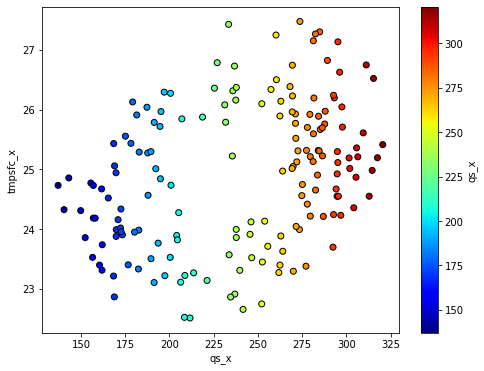

In [11]:
line1 = HBox(children=[x_select,modelx])
line2 = HBox(children=[y_select,modely])
line3 = HBox(children=[c_select,modelc])
VBox(children=[line1,line2,line3,button])

In [15]:
'''color maps to chose from
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]'''

"color maps to chose from\ncmaps = [('Perceptually Uniform Sequential', [\n            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),\n         ('Sequential', [\n            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',\n            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',\n            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),\n         ('Sequential (2)', [\n            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',\n            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',\n            'hot', 'afmhot', 'gist_heat', 'copper']),\n         ('Diverging', [\n            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',\n            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),\n         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),\n         ('Qualitative', [\n            'Pastel1', 'Pastel2', 'Paired', 'Accent',\n            'Dark2', 'Set1', 'Set2', 'Set3',\n            'tab10', 'tab20', 'tab20b', 't